# Child Mind Institute — Problematic Internet Use

## Team notes & log

🔔 <b>REMINDER:</b> Make sure to use GitHub pull before starting work and push when finishing.

<u><b>To Do</b></u>

- Feature engineering
- Include parque data
- CP: Start training the model (Random Forest).
- AG: Visualization
- Finish Due Date 11/12/24. Before 6 pm Tuesday

<u><b>Worklog</b></u>

- CP 11/3: Cleaned up some repetitve sections.
- CP 11/5: Merged notebooks with AG & CP's work.
- AG 11/7: Drop unnecessary columns. Dropped a few of them.
- CP 11/11: Filled missing values using KNN, started training the model using Random Forest, calculated scores.

<u><b>Submissions and Results</b></u>

- CP 11/11: Random Forest,


## Preprocessing


In [299]:
# Import libraries



# CP

import numpy as np

import pandas as pd

#### AG 11/2/24 ###

import matplotlib.pyplot as plt 

import seaborn as sns 

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [300]:
import os



# CP: Load data



# CP: Check if you are running in Kaggle or locally



#CP: Running locally

if os.path.exists('kaggle_data'):

    train = pd.read_csv('kaggle_data/train.csv')

    test = pd.read_csv('kaggle_data/test.csv')

    data_dict = pd.read_csv('kaggle_data/data_dictionary.csv')



# CP: Running in Kaggle

else:

    train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')

    test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')

    data_dict = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')



# CP: Show all rows when displaying data

pd.set_option('display.max_rows', None)



# CP: Display data dictionary

data_dict

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
5,Children's Global Assessment Scale,CGAS-CGAS_Score,Children's Global Assessment Scale Score,int,NaN,NaN
6,Physical Measures,Physical-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
7,Physical Measures,Physical-BMI,Body Mass Index (kg/m^2),float,NaN,NaN
8,Physical Measures,Physical-Height,Height (in),float,NaN,NaN
9,Physical Measures,Physical-Weight,Weight (lbs),float,NaN,NaN


In [301]:
#### AG 11/2/24 ###

train.head(20)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,4.0,1.0,0.0,20.0,Winter,27.0,40.0,Fall,3.0,0.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,2.0,NaN
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0,NaN
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
#There are null values in every column except for "age" , "sex", and "basic season" 

#sii: Suicide Ideation Inventory: Range (0-3)

train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,3960.0,10.433586,3.574648,5.000000,8.000000,10.000000,13.000000,22.000000
Basic_Demos-Sex,3960.0,0.372727,0.483591,0.000000,0.000000,0.000000,1.000000,1.000000
CGAS-CGAS_Score,2421.0,65.454771,22.341862,25.000000,59.000000,65.000000,75.000000,999.000000
Physical-BMI,3022.0,19.331929,5.113934,0.000000,15.869350,17.937682,21.571244,59.132048
Physical-Height,3027.0,55.946713,7.473764,33.000000,50.000000,55.000000,62.000000,78.500000
Physical-Weight,3076.0,89.038615,44.569040,0.000000,57.200000,77.000000,113.800000,315.000000
Physical-Waist_Circumference,898.0,27.278508,5.567287,18.000000,23.000000,26.000000,30.000000,50.000000
Physical-Diastolic_BP,2954.0,69.648951,13.611226,0.000000,61.000000,68.000000,76.000000,179.000000
Physical-HeartRate,2967.0,81.597236,13.665196,27.000000,72.000000,81.000000,90.500000,138.000000
Physical-Systolic_BP,2954.0,116.983074,17.061225,0.000000,107.000000,114.000000,125.000000,203.000000


In [303]:
####AG###



#### Notes ####


## Children Global Assessment Scale(CGAS) score is used to check the general 

#functioning level of children typically in the range of 1-100 

#CGAS score has max value 999 which might be an outlier.



##PCIAT-PCIAT_Total = Parent-Child Internet Addiction Test

#the score reflects addiction or PIU, which might be 0 if no problematic behavior is found

##SDS-SDS_Total_Raw: Self-Rating Depression , raw scores can range from: 20-80

#min for this is 38 in the table which means even lowest 

#scoring children may be experiencing mild depressive symptoms

##PreInt_EduHx-computerinternet_hoursday : avg number of hours per day spent using internet

In [304]:
####AG###



## Report of the extensive missing values ## 



# Fitness_Endurance-Max_Stage: 743 non-null (81% missing)

# Fitness_Endurance-Time_Mins: 740 non-null (81% missing)

# Fitness_Endurance-Time_Sec: 740 non-null (81% missing)

# Physical-Waist_Circumference: 898 non-null (77% missing)

# BIA-Activity_Level_num: 1991 non-null (50% missing)

# BIA-BMC: 1991 non-null (50% missing)

# BIA-BMI: 1991 non-null (50% missing)

# BIA-BMR: 1991 non-null (50% missing)

# BIA-DEE: 1991 non-null (50% missing)

# BIA-ECW: 1991 non-null (50% missing)

# PAQ_A-Season: 475 non-null (88% missing)

# PAQ_A-PAQ_A_Total: 475 non-null (88% missing)

# PAQ_C-Season: 1721 non-null (57% missing)

# PAQ_C-PAQ_C_Total: 1721 non-null (57% missing)

# PCIAT-Season: 2736 non-null (31% missing) with multiple related PCIAT columns also having missing data.

# SDS-Season: 2618 non-null (34% missing)

# SDS-SDS_Total_Raw: 2609 non-null (35% missing)

# SDS-SDS_Total_T: 2606 non-null (35% missing)



# CP: Check for missing/null values

train.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
CGAS-CGAS_Score                           1539
Physical-Season                            650
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
Physical-Waist_Circumference              3062
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
Fitness_Endurance-Season                  2652
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
FGC-Season                                 614
FGC-FGC_CU                                1638
FGC-FGC_CU_Zone                           1678
FGC-FGC_GSND 

In [305]:
# CP: Explore data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [306]:
# CP: Explore data

train.shape

(3960, 82)

In [307]:
# CP: Check target values

train['sii'].value_counts()

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

In [308]:
# CP: Check missing target values

train['sii'].isnull().sum()

np.int64(1224)

In [309]:
# CP: Drop any rows where target value is missing

# since they cannot be used for training.

train.dropna(subset=['sii'], inplace=True)

In [310]:
# CP: Recheck missing target values

train['sii'].isnull().sum()

np.int64(0)

In [311]:
# CP: Check for duplicates

train.duplicated().sum()

np.int64(0)

In [312]:
train.shape

(2736, 82)

In [313]:
# 11/7/24 AG ###
#checking columns with more than 50% of the data missing
missing_percentage = train.isnull().mean() * 100
columns_with_missing_data = missing_percentage[missing_percentage > 50]
columns_with_missing_data


Physical-Waist_Circumference    82.346491
Fitness_Endurance-Season        53.947368
Fitness_Endurance-Max_Stage     73.282164
Fitness_Endurance-Time_Mins     73.391813
Fitness_Endurance-Time_Sec      73.391813
FGC-FGC_GSND                    68.128655
FGC-FGC_GSND_Zone               68.421053
FGC-FGC_GSD                     68.165205
FGC-FGC_GSD_Zone                68.421053
PAQ_A-Season                    86.732456
PAQ_A-PAQ_A_Total               86.732456
dtype: float64

In [314]:
#Checking the correlation of the numeric columns with sii 
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# No sii in  the numerical columns to avoid correlating it with itself
numerical_columns = numerical_columns[numerical_columns != 'sii']
correlation = train[numerical_columns].corrwith(train['sii'])

correlation


Basic_Demos-Age                           0.365990
Basic_Demos-Sex                          -0.100148
CGAS-CGAS_Score                          -0.085261
Physical-BMI                              0.221125
Physical-Height                           0.373530
Physical-Weight                           0.325938
Physical-Waist_Circumference              0.272885
Physical-Diastolic_BP                     0.050971
Physical-HeartRate                       -0.024572
Physical-Systolic_BP                      0.135336
Fitness_Endurance-Max_Stage              -0.070589
Fitness_Endurance-Time_Mins              -0.060628
Fitness_Endurance-Time_Sec                0.008701
FGC-FGC_CU                                0.247364
FGC-FGC_CU_Zone                          -0.023944
FGC-FGC_GSND                              0.149495
FGC-FGC_GSND_Zone                         0.001667
FGC-FGC_GSD                               0.163448
FGC-FGC_GSD_Zone                          0.023696
FGC-FGC_PU                     

In [315]:
train.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                                394
CGAS-CGAS_Score                            394
Physical-Season                            141
Physical-BMI                               209
Physical-Height                            206
Physical-Weight                            164
Physical-Waist_Circumference              2253
Physical-Diastolic_BP                      258
Physical-HeartRate                         250
Physical-Systolic_BP                       258
Fitness_Endurance-Season                  1476
Fitness_Endurance-Max_Stage               2005
Fitness_Endurance-Time_Mins               2008
Fitness_Endurance-Time_Sec                2008
FGC-Season                                  89
FGC-FGC_CU                                 817
FGC-FGC_CU_Zone                            852
FGC-FGC_GSND 

In [316]:
# Check the missing percentage for specific columns
columns_of_interest = ['PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'Physical-Waist_Circumference',
                       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec']

# percentage of missing values in these columns
missing_percentage = train[columns_of_interest].isnull().mean() * 100
print("Missing percentage:")
print(missing_percentage)

numerical_columns = train[columns_of_interest].select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation of the numerical columns with the target variable 'sii'
correlation_with_sii = train[numerical_columns].corrwith(train['sii'])

print("\nCorrelation with sii:")
print(correlation_with_sii)


Missing percentage:
PAQ_A-Season                    86.732456
PAQ_A-PAQ_A_Total               86.732456
Physical-Waist_Circumference    82.346491
Fitness_Endurance-Max_Stage     73.282164
Fitness_Endurance-Time_Mins     73.391813
Fitness_Endurance-Time_Sec      73.391813
dtype: float64

Correlation with sii:
PAQ_A-PAQ_A_Total              -0.050386
Physical-Waist_Circumference    0.272885
Fitness_Endurance-Max_Stage    -0.070589
Fitness_Endurance-Time_Mins    -0.060628
Fitness_Endurance-Time_Sec      0.008701
dtype: float64


In [317]:
#creating a backup
backup_train = train.copy()

In [318]:
#Dropping columns that have null values more than 50% and weak sii connection
#train.drop(columns=columns_of_interest, inplace=True)
train.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                                394
CGAS-CGAS_Score                            394
Physical-Season                            141
Physical-BMI                               209
Physical-Height                            206
Physical-Weight                            164
Physical-Waist_Circumference              2253
Physical-Diastolic_BP                      258
Physical-HeartRate                         250
Physical-Systolic_BP                       258
Fitness_Endurance-Season                  1476
Fitness_Endurance-Max_Stage               2005
Fitness_Endurance-Time_Mins               2008
Fitness_Endurance-Time_Sec                2008
FGC-Season                                  89
FGC-FGC_CU                                 817
FGC-FGC_CU_Zone                            852
FGC-FGC_GSND 

In [319]:
#train = train.fillna(0) # replacing null values with 0 for uniformity

In [320]:
train.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                                394
CGAS-CGAS_Score                            394
Physical-Season                            141
Physical-BMI                               209
Physical-Height                            206
Physical-Weight                            164
Physical-Waist_Circumference              2253
Physical-Diastolic_BP                      258
Physical-HeartRate                         250
Physical-Systolic_BP                       258
Fitness_Endurance-Season                  1476
Fitness_Endurance-Max_Stage               2005
Fitness_Endurance-Time_Mins               2008
Fitness_Endurance-Time_Sec                2008
FGC-Season                                  89
FGC-FGC_CU                                 817
FGC-FGC_CU_Zone                            852
FGC-FGC_GSND 

In [321]:
# CP: Drop columns with season data
train = train.drop(columns=train.filter(regex='Season$').columns)
test = test.drop(columns=test.filter(regex='Season$').columns)
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 71 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Age                         2736 non-null   int64  
 2   Basic_Demos-Sex                         2736 non-null   int64  
 3   CGAS-CGAS_Score                         2342 non-null   float64
 4   Physical-BMI                            2527 non-null   float64
 5   Physical-Height                         2530 non-null   float64
 6   Physical-Weight                         2572 non-null   float64
 7   Physical-Waist_Circumference            483 non-null    float64
 8   Physical-Diastolic_BP                   2478 non-null   float64
 9   Physical-HeartRate                      2486 non-null   float64
 10  Physical-Systolic_BP                    2478 non-null   float64
 

In [322]:
# CP: Drop IDs, not needed for training
train.drop(['id'], axis=1, inplace=True)

In [323]:
# CP: Fill in missing values using KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train_filled = imputer.fit_transform(train)
train = pd.DataFrame(train_filled, columns=train.columns)
train.isnull().sum().sum()

np.int64(0)

In [324]:
# Ensure the test dataframe has the same columns as the training dataframe
test_no_id = test.drop(columns=['id'])
test_no_id = test_no_id.reindex(columns=train.columns, fill_value=0)

# Apply the imputer to the test dataframe without the 'id' column
test_filled = imputer.transform(test_no_id)
test_backup = test.copy()
test = pd.DataFrame(test_filled, columns=test_no_id.columns)

## Training the model

Portions of Random Forest code used from class.


In [325]:
# CP: Import the necessary libraries
from sklearn.metrics import roc_auc_score

In [326]:
# Split the data into training and test sets
X_train = train.drop('sii', axis=1).copy()
y_train = train['sii'].copy()
X_test = test.copy()
X_train.shape, y_train.shape, X_test.shape

((2736, 69), (2736,), (20, 70))

In [327]:
# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
# Make sure train and test sets have the same columns
train_columns = X_train.columns
test_columns = X_test.columns
missing_columns = set(train_columns) - set(test_columns)
missing_columns

set()

In [329]:
# Make sure train and test match
X_test = X_test.reindex(columns=X_train.columns)

In [330]:
# Number of samples and features
num_features = X_train.shape[1]
num_samples = X_train.shape[0]
num_samples, num_features


(2736, 69)

In [331]:
clf = RandomForestClassifier(warm_start=True, 
                               oob_score=True,
                               min_samples_leaf=40,
                               max_depth = 10,
                               random_state=42)

error_rate = {}

# Range of n_estimators values to explore.
min_estimators = 80
max_estimators = 500

for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i) 
    clf.fit(X_train.values, y_train.values)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - clf.oob_score_
    error_rate[i] = oob_error

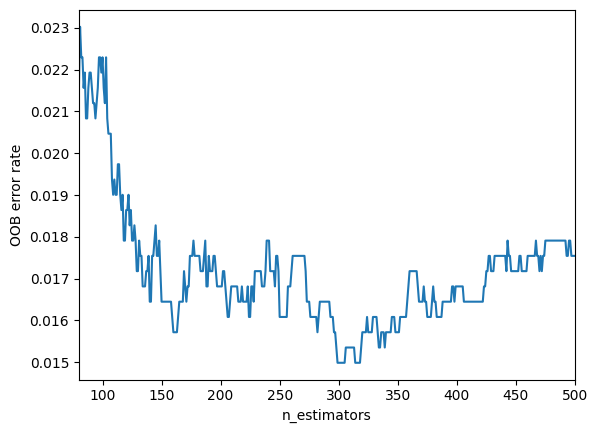

In [332]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
# OOB error rate = num_missclassified/total observations (%)\
xs = []
ys = []
for label, clf_err in error_rate.items():
    xs.append(label)
    ys.append(clf_err)   
plt.plot(xs, ys)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show();


In [357]:
# Get scores (accuracy, precision, recall, f1, roc-auc)
y_pred = clf.predict(X_train.values)
y_pred_proba = clf.predict_proba(X_train.values)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')
roc_auc = roc_auc_score(y_train, y_pred_proba, multi_class='ovr')

# Print the scores
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)
print('ROC-AUC:', roc_auc)

Accuracy:  0.985014619883041
Precision:  0.9858673802703652
Recall:  0.985014619883041
F1:  0.9790656422885795
ROC-AUC: 0.9978369420581095


In [334]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_train, y_pred)
cnf_matrix

array([[1594,    0,    0,    0],
       [   0,  730,    0,    0],
       [   0,    7,  371,    0],
       [   0,    0,   34,    0]])

Text(0.5, 427.9555555555555, 'Predicted label')

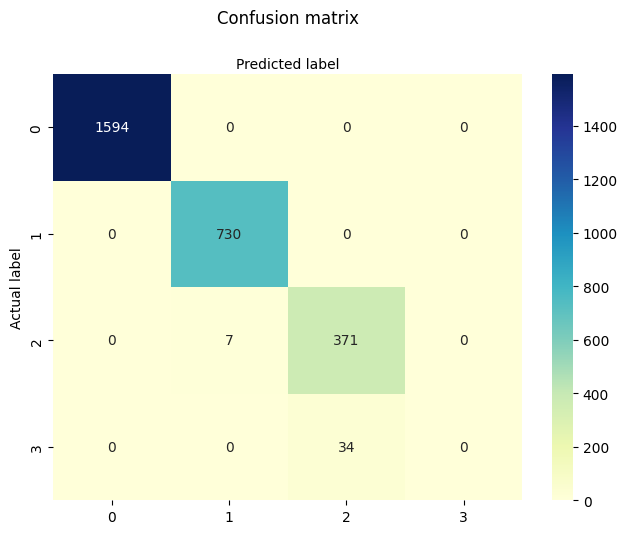

In [335]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [336]:
# Get feature importances
columns = train.columns

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# print(importances)
# print(indices)

# Summarize feature importances
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {columns[indices[f]]} ({importances[indices[f]]:.3f})")

# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
# plt.xticks(range(X_train.shape[1]), [columns[i] for i in indices], rotation=90)
# plt.xlim([-1, X_train.shape[1]])
# plt.show()

Feature ranking:
1. feature PCIAT-PCIAT_Total (0.317)
2. feature PCIAT-PCIAT_05 (0.072)
3. feature PCIAT-PCIAT_02 (0.067)
4. feature PCIAT-PCIAT_15 (0.065)
5. feature PCIAT-PCIAT_17 (0.058)
6. feature PCIAT-PCIAT_03 (0.053)
7. feature PCIAT-PCIAT_18 (0.047)
8. feature PCIAT-PCIAT_19 (0.030)
9. feature PCIAT-PCIAT_13 (0.029)
10. feature PCIAT-PCIAT_10 (0.029)
11. feature PCIAT-PCIAT_08 (0.027)
12. feature PCIAT-PCIAT_01 (0.027)
13. feature PCIAT-PCIAT_14 (0.024)
14. feature PCIAT-PCIAT_09 (0.024)
15. feature PCIAT-PCIAT_16 (0.023)
16. feature PCIAT-PCIAT_20 (0.020)
17. feature PCIAT-PCIAT_11 (0.017)
18. feature PCIAT-PCIAT_06 (0.012)
19. feature PCIAT-PCIAT_04 (0.011)
20. feature PAQ_A-PAQ_A_Total (0.008)
21. feature PCIAT-PCIAT_07 (0.004)
22. feature Physical-Height (0.003)
23. feature PCIAT-PCIAT_12 (0.003)
24. feature BIA-BIA_Fat (0.002)
25. feature Basic_Demos-Age (0.002)
26. feature Physical-Weight (0.002)
27. feature FGC-FGC_CU (0.002)
28. feature BIA-BIA_LDM (0.002)
29. feature B

In [359]:
# Generate predictions for the test set
y_test_pred = clf.predict(X_test.values)

# Convert to int
y_test_pred = y_test_pred.astype(int)

In [360]:
# Export CSV file with predictions
output = pd.DataFrame({'id': test_backup['id'], 'sii': y_test_pred})
output.to_csv('submissions/1_random-forest.csv', index=False)
print("Submission #1 was successfully saved.")

Submission #1 was successfully saved.
